<a href="https://colab.research.google.com/github/rrajasek95/nlp-243-notebooks/blob/main/Section_4_PyTorch_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Basics

This notebook will cover PyTorch tensors and associated concepts of linear algebra, and how to implement gradient descent using PyTorch. We will be covering more comprehensive use of PyTorch for actual classification and regression tasks in the next section when dealing with Multilayer Perceptrons.

We will be making use of GPU training as a proof-of-concept, so please enable a GPU runtime by clicking on *Runtime > Change Runtime Type* and selecting GPU acceleration.

## Using PyTorch

To use the PyTorch library, we will need to import the `torch` module

In [ ]:
import torch

## PyTorch Tensors

PyTorch Tensors are created using the `torch.Tensor` class. We will show different ways to declare tensors using subclasses and special convenience methods.

In [ ]:
# Declare using the tensor class
identity_3 = torch.Tensor([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
zero_3 = torch.FloatTensor([[0, 0, 0], [0, 0, 0], [0, 0, 0]])
ones_3 = torch.LongTensor([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

# Convenience method to declare an identity matrix
i3 = torch.eye(3)
zero3 = torch.zeros((3, 3)) # 3 by 3 zero matrix
ones3 = torch.ones((3, 3))

# 4D tensor
four_d_tensor = torch.stack((zero3, ones3))

zero4 = torch.zeros((3, 3, 3))

for tensor in [identity_3, zero_3, ones_3, i3, zero3, ones3, four_d_tensor, zero4]:
    print("Tensor:")
    print(tensor)
    print()

Tensor:
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

Tensor:
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Tensor:
tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])

Tensor:
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

Tensor:
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Tensor:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Tensor:
tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])

Tensor:
tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])



## Tensor Operations

Tensor support common linear algebra operations:
* Addition
* Subtraction
* Scalar multiplication
* Dot product (useful for vectors)
* Element wise product
* Matrix product

In [ ]:

print("Sum of two ones matrices:")
print(ones3 + ones3)
print()

print("Difference between ones and identity matrices:")
print(ones3 - i3)

print("Scaling a tensor:")
print(3 * i3)

print("Element wise product:")
print((ones3 + ones3) * (ones3 + ones3))

print("element wise division")
print((ones3 + ones3) / (ones3 + ones3))

print("Matrix product:")
print((ones3 + ones3) @ (ones3 + ones3))

vec1 = torch.FloatTensor([2, 0, 2])
vec2 = torch.FloatTensor([0, 1, 2])

print("Dot product:")
print(torch.dot(vec1, vec2))
print(vec1 @ vec2) # Alternate

print("Matrix product between tensor and vector:")
print(ones3 @ vec1) # Take dot product of vector with each row of the matrix. Vector must always be after the matrix for this to work

Sum of two ones matrices:
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Difference between ones and identity matrices:
tensor([[0., 1., 1.],
        [1., 0., 1.],
        [1., 1., 0.]])
Scaling a tensor:
tensor([[3., 0., 0.],
        [0., 3., 0.],
        [0., 0., 3.]])
Element wise product:
tensor([[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]])
element wise division
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Matrix product:
tensor([[12., 12., 12.],
        [12., 12., 12.],
        [12., 12., 12.]])
Dot product:
tensor(4.)
tensor(4.)
Matrix product between tensor and vector:
tensor([4., 4., 4.])


## Some Additional Linear Algebra Concepts

### Inverse of a Matrix

Torch provides methods to calculate inverse of a square matrix. An inverse $A^{-1}$ is a matrix such that $AA^{-1} = A^{-1}A = I$ holds. The inverse is given by $A^{-1} = \frac{1}{|A|} Cofactor(A)^T$ where $|A|$ is the determinant of $A$. This implies that when $|A| = 0$, the inverse is undefined as we will be performing a division by $0$. Such matrices are called *singular matrices*. 

Note that inverse is not defined for non-square matrices. There is an equivalent concept called _pseudoinverse_ for non-square matrices which behave like an inverse matrix for specific problems.

In [ ]:

example_matrix = torch.Tensor([[1, 0, 3], [4, 5, 6], [7, 8, 9]])
print(example_matrix)
print("Inverse of 3x3 matrix")
print(torch.inverse(example_matrix))

print("Product of matrix and inverse")
print(torch.mm(example_matrix, torch.inverse(example_matrix)))


tensor([[1., 0., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
Inverse of 3x3 matrix
tensor([[ 0.2500, -2.0000,  1.2500],
        [-0.5000,  1.0000, -0.5000],
        [ 0.2500,  0.6667, -0.4167]])
Product of matrix and inverse
tensor([[ 1.0000e+00,  5.9605e-08, -5.9605e-08],
        [ 2.0862e-07,  1.0000e+00,  1.1921e-07],
        [ 3.1292e-07, -5.3644e-07,  1.0000e+00]])



### Norm
One important concept is that of the *Norm* of a vector or matrix. 

If you treat each element of a vector or tensor as some kind of distance from an origin along a particular axis, the norm tries to capture the total distance away from origin as a scalar value.

For example, consider the vector $ \langle 1, 0, 3 \rangle $. This can represent the $ \langle x, y, z \rangle $ coordinates of a point from origin. If we try to calculate the Euclidean distance from origin, it will be $||D|| = \sqrt{1^2 + 0^2 + 3^2} = \sqrt{10}$. In general, for an n-dimensional vector $\langle x_1, x_2, \dots, x_n \rangle$, the distance/norm is given by $||D|| = \sqrt{\sum_{i=1}^n x_i^2}$. This is also called the $L_2$ norm.

There are other norms which use a different power to calculate this "distance". The general equation for a q-norm (also called Minkowski distance) is $||D||_q = (\sum_{i=1}^n |x_i|^q)^\frac{1}{q}$ where $|x|$ represents the absolute value. 

The $L_1$ norm or _Manhattan Distance_ is given by $||D||_1 = \sum_{i=1}^n |x_i| $ which is the sum of absolute values of the components.

One important property arises when each value of a vector/matrix is divided by the norm. The resultant norm of this new vector/matrix is always 1. This process of rescaling the vector/matrix to a unit norm is called normalization.

*Exercise: Prove this property*

For matrices, the norm is computed by computing the square root of the sum of squares of all the elements. This is called the Frobenius Norm.

$$ ||A|| = \sqrt{\sum_i\sum_j a_{ij}^2} $$

In [ ]:
vec3 = torch.FloatTensor([3, 0, 4])

print("L2 Norm of (3, 0, 4) = ?")
print(torch.norm(vec3)) # By default, L2 norm is always calculated

print("Dividing each element by the norm (a.k.a normalization)")
print(vec3 / torch.norm(vec3))

print("L2 Norm of a normalized vector:")
print(torch.norm(vec3 / torch.norm(vec3)))

vec4 = torch.FloatTensor([3, 0, -4])
print("L1 Norm of (3, 0, -4) = ?")
print(torch.norm(vec4, p=1))

print("Dividing each element by L1 norm")
print(vec4 / torch.norm(vec4, p=1))

print("L1 Norm of a normalized vector:")
print(torch.norm(vec4 / torch.norm(vec4, p=1), p=1))

L2 Norm of (3, 0, 4) = ?
tensor(5.)
Dividing each element by the norm (a.k.a normalization)
tensor([0.6000, 0.0000, 0.8000])
L2 Norm of a normalized vector:
tensor(1.)
L1 Norm of (3, 0, -4) = ?
tensor(7.)
Dividing each element by L1 norm
tensor([ 0.4286,  0.0000, -0.5714])
L1 Norm of a normalized vector:
tensor(1.)


The notion of norm will become very important when we talk about regularization and normalizing data. 

Another useful concept is computing cosine similarity. In 2-D space, cosine similarity is calculated as the cosine angle between the two vectors

$$ cos(( x_1,y_1 ), ( x_2, y_2 )) = \frac{(x_1 * x2 + y_1 * y_2)}{\sqrt{x_1^2 + y_1^2} \sqrt{x_2^2 + y_2^2}}$$

We can extend this to n-dimensional vectors by using the $L_2$ norm as follows

$$ cos(U, V) = \frac{ \langle U, V \rangle}{||U||_2 ||V||_2} $$

Where $\langle U, V \rangle $ represents the inner/dot product of two vectors $U$ and $V$.

Exercises:
* Show that $cos(U, U) = 1$ for $U \neq 0$.

In [ ]:
def cosine_similarity(u, v):
    # Find the cosine similarity of vectors U and V both of the same number of dimensions
    return (u @ v) / (torch.norm(u) * torch.norm(v))


print(cosine_similarity(vec3, vec4))

tensor(-0.2800)


### Eigenvalues and Eigenvectors

Eigenvectors of a square matrix $A$ are vectors $v$ which obey the property

$$
    Av = \lambda v
$$

where $\lambda$ is a scalar value called the Eigenvalue. This defines a notion that there are some vectors $v$ which simply get "scaled" by the matrix.

Eigenvalues are calculated by solving the characteristic equation

$$
|A - \lambda I| = 0
$$

Where $|A|$ is the determinant and $I$ is the identity matrix with the same dimensions as $A$

If the matrix dimension is $n \times n$, we will have an $n^{th}$ order equation to solve, which yields roots $\lambda_1, \dots, \lambda_n$. These are called the eigenvalues of the matrix $A$. 

Once we have obtained the eigen values, we can substitute them in the equation
$$
(A - \lambda_i)v_i = 0
$$

And solve for the terms in the vector.

One important property is that these vectors can be thought of as the principal axes for a transformation.

In [ ]:
print(torch.eig(ones3, eigenvectors=True))

torch.return_types.eig(
eigenvalues=tensor([[ 3.0000e+00,  0.0000e+00],
        [ 1.3765e-07,  0.0000e+00],
        [-7.1054e-15,  0.0000e+00]]),
eigenvectors=tensor([[-5.7735e-01, -8.1389e-01,  4.4561e-08],
        [-5.7735e-01,  3.5054e-01, -7.0711e-01],
        [-5.7735e-01,  4.6335e-01,  7.0711e-01]]))


Eigenvalues and Eigenvectors are used for performing Principal Component Analysis which is a dimensionality reduction technique. We will not describe this in the interest of time, but it is useful to know about, even informally.

Simple exercises for eigenvalues:
* What are the eigenvalues and eigenvectors of a diagonal matrix $D$?
* Read about and implement PCA using `torch.eig`

Slightly more involved exercises:
* Prove that the all the eigenvalues of a symmetric matrix are real
* Show that for a symmetric matrix $A$, the eigenvectors form an orthonormal basis i.e. for any two eigenvectors $v_i$ and $v_j$ such that $v_i \neq v_j$, we have $v_i^T v_j = 0$.

## Sampling Data from Distributions


### Parameter Initialization
For most parametric models , we will have to set the model weights to some  initial values. Typically, weights are initialized in a distribution centered at 0.

Typical distributions used:
* Uniform
* Normal Distribution
* Multinomial Distribution

In [ ]:
import seaborn as sns

NameError: ignored

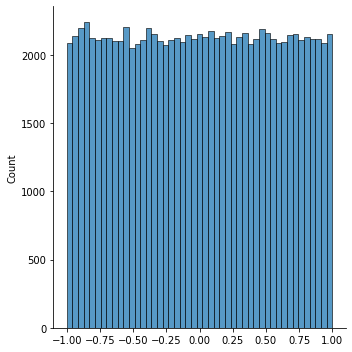

In [ ]:
# Drawing from a uniform distribution
a = -1
b = 1

# torch.rand - samples from U(0, 1)
# sample from [a, b] - a, 
w = torch.rand(size=(100000,))*(b - a) + a # Draw numbers randomly from a uniform distribution from [a, b)
sns.displot(w)
plt.show()

NameError: ignored

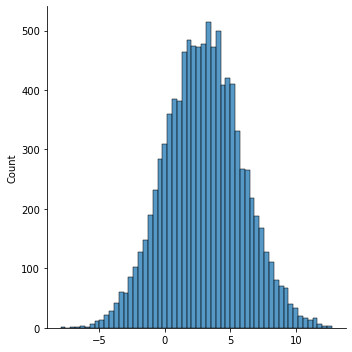

In [ ]:
# Drawing from a standard normal distribution
# Alternatively, use torch.randn which by default draws from N(0, 1)
w = torch.normal(3, 3, size=(10000,))
sns.displot(w)
plt.show()

NameError: ignored

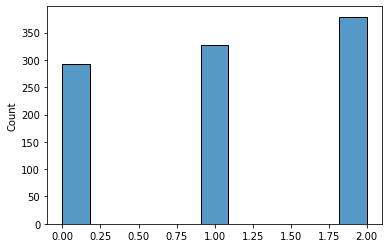

In [ ]:
# Draw from a multinomial distribution
# [p_0, p_1, p_2]
w = torch.multinomial(torch.Tensor([3, 3, 4]), num_samples=1000, replacement=True)

sns.histplot(w)
plt.show()

## Using PyTorch GPU

PyTorch helps us use the GPU for performing linear algebra operations. In order to do so, the data must be copied onto the GPU directly. However, we must ensure that we are able to use the GPU via NVIDIA CUDA. For that, we must check if we can access it. If not, we must safely fall back to the CPU.

In [ ]:
print("Do we have a GPU? ", torch.cuda.is_available())

# Using CUDA
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print("Device to use", device)

Do we have a GPU?  True
Device to use cuda


We now try to assign a tensor to a GPU

In [ ]:
cuda_ones = torch.ones((3, 3), device=device)

print(cuda_ones) # Spot the difference in the output from earlier

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')


Dimension size:  (1, 1)
CPU
Time elapsed:  0.0004711151123046875
CUDA
Time elapsed:  0.0073659420013427734
Speedup:  0.0639585693477909

Dimension size:  (10, 10)
CPU
Time elapsed:  0.0014138221740722656
CUDA
Time elapsed:  0.001322031021118164
Speedup:  1.0694319206492335

Dimension size:  (20, 20)
CPU
Time elapsed:  0.0011703968048095703
CUDA
Time elapsed:  0.001039743423461914
Speedup:  1.1256592524650308

Dimension size:  (50, 50)
CPU
Time elapsed:  0.0016505718231201172
CUDA
Time elapsed:  0.0012559890747070312
Speedup:  1.3141609719058467

Dimension size:  (100, 100)
CPU
Time elapsed:  0.0038781166076660156
CUDA
Time elapsed:  0.0009424686431884766
Speedup:  4.114849481406527

Dimension size:  (200, 200)
CPU
Time elapsed:  0.035538673400878906
CUDA
Time elapsed:  0.0008263587951660156
Speedup:  43.00634737449509

Dimension size:  (300, 300)
CPU
Time elapsed:  0.05239534378051758
CUDA
Time elapsed:  0.0008790493011474609
Speedup:  59.604556550040684

Dimension size:  (500, 500)
CP

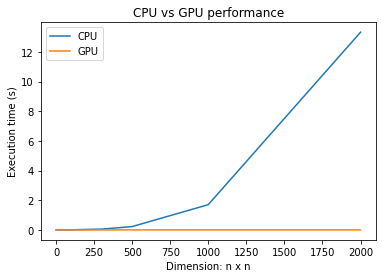

In [ ]:
# Which is more efficient, CPU or GPU?
import time
def multiply_a_lot(U, V, out):
    start = time.time()
    for _ in range(100):
        torch.matmul(U, V, out=out) 
        # We use out to avoid having to create a new tensor
    end = time.time()

    print("Time elapsed: ", end - start)

    return end - start

dim_sizes = [1, 10, 20, 50, 100, 200, 300, 500, 1000, 2000]
cpu_times = []
cuda_times = []

for dim_size in dim_sizes:
    torch.cuda.empty_cache() # Free memory

    print("Dimension size: ", (dim_size, dim_size))
    ones = torch.ones((dim_size, dim_size))
    print("CPU")
    out = torch.empty_like(ones)

    cpu_exec_time = multiply_a_lot(ones, ones, out)
    cpu_times.append(cpu_exec_time)

    print("CUDA")
    ones_cuda = torch.ones((dim_size, dim_size), device=device)
    out_cuda = torch.empty_like(ones_cuda)
    gpu_exec_time = multiply_a_lot(cuda_ones, cuda_ones, out_cuda)

    cuda_times.append(gpu_exec_time)
    print("Speedup: ", cpu_exec_time / gpu_exec_time)
    print()

import matplotlib.pyplot as plt


plt.plot(dim_sizes, cpu_times, label='CPU')
plt.plot(dim_sizes, cuda_times, label='GPU')
plt.legend()
plt.title('CPU vs GPU performance')
plt.xlabel('Dimension: n x n')
plt.ylabel('Execution time (s)')
plt.show()

## Implementing a Linear Model

Remembering the description for a linear model

$$
\mathbf{y} = \mathbf{w}^T \mathbf{x} + \mathbf{b} \\
\mathbf{x} = (x_1, \dots, x_n) \\
\mathbf{w} = (w_1, \dots, w_n)
$$



Here, $\mathbf{y}$ and $\mathbf{b}$ are scalars and $\mathbf{w}$ and $\mathbf{x}$ are vectors of dimension $d$. We can use the add-a-dimension trick to convert the equation to 

$$
\mathbf{y} = \mathbf{w}^T \mathbf{x} \tag*{[$w_0 = b, x_0 = 1$, remaining terms remain the same]}
$$

If we have a dataset $\mathcal{D} = (X, Y) = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \dots, (x^{(n)}, y^{(n)})\}$ and a weight vector $\mathbf{w}$. We can compute the outputs for the whole dataset as

$$
\hat{Y} = \mathbf{w}^T \mathbf{X}
$$

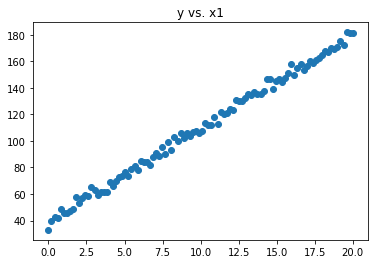

In [ ]:
true_w = torch.FloatTensor([3, 4])
x1 = torch.linspace(0, 20, 100)
x2 = torch.linspace(10, 30, 100)

# y = 3*x1 + 4*x2

X = torch.stack((x1, x2)).T

Y = X @ true_w + torch.normal(0, 3, size=(100,))

plt.scatter(X[:, 0], Y)
plt.title('y vs. x1')
plt.show()


$$\hat{Y} = \begin{pmatrix}\hat{y}^{(1)} \\ \hat{y}^{(2)} \\ \dots \\ \hat{y}^{(n)}\end{pmatrix}$$

We can calculate the error of our model deviating from the true values using the mean squared error metric

$$
    \mathcal{L}(Y, \hat{Y}) = \frac{1}{2N}\sum_{i=1}^{n}(y^{(i)} - \hat{y}^{(i)})^2 \\
    \mathcal{L}(Y, \hat{Y}) = \frac{1}{2N}(Y - \hat{Y})^T . (Y - \hat{Y}) \\
    \mathcal{L}(Y, \hat{Y}) = \frac{1}{2N}(Y - \mathbf{w}^T \mathbf{X} )^T . (Y - \mathbf{w}^T \mathbf{X})
$$

In [ ]:
# Let's assume that by some "magic" we got the true parameters
estimated_w = true_w

def mse_loss(Y, Y_hat):
    # Calculate the mean squared error loss of our estimated outputs, 
    # with respect to our inputs

    return 1 / (2 * Y.shape[0]) * torch.norm(Y - Y_hat)**2

    # raise NotImplementedError()

print("Loss: ", mse_loss(Y, X @ estimated_w))


Loss:  tensor(3.9061)


### Closed Form Solution
We obtain the best fit by minimizing the loss with respect to $W$ which can be obtained by taking the gradient w.r.t. $W$ and setting it to 0.

We can find a closed form solution $w$ as follows:

$$
w = (X^T X)^{-1}X^TY
$$

*Exercise: Can you derive this mathematically?*

In [ ]:
estimated_w = torch.inverse((X.T @ X)) @ X.T @ Y

print(estimated_w)

tensor([3.1191, 3.9276])


### Linear Model Estimation using Gradient Descent

#### Deriving the Gradient Descent update rule
Alternatively, we can optimize using the gradient descent algorithm. This algorithm is based on the fact that the gradient of the loss function w.r.t. the parameters will be 0 at an optima and non-zero elsewhere. At a point close to an optima, the gradient will be a vector that will be pointing away from the minima.

Using this information, we can push the parameters towards the minimum by using the following update rule

$$
w = w - \eta \nabla_w L(Y, \hat{Y})
$$

In the above expression, $\nabla_w L(Y, \hat{Y})$ denotes the gradient of the loss function with respect to $w$ and $\eta$ is a learning rate parameter that can be either constant or changing. 

This is the general form of the gradient descent algorithm that works for any differentiable function of the parameters.

For the case of our linear model, we can show the gradient to be

$$
 \nabla_w L(Y, \hat{Y}) = \frac{1}{N}(\hat{Y} - Y) X
$$

*Exercise: Derive this*

This yields the update rule to be

$$
w = w - \eta . \frac{1}{N}(\hat{Y} - Y) X
$$

In [ ]:

# w is the parameter to optimize
w = torch.normal(mean=0, std=10, size=(X.shape[1],))

LEARNING_RATE = 1e-3

N_ITERATIONS = 10000


prev_loss = torch.FloatTensor([float('inf')])

for i in range(N_ITERATIONS):

    Y_hat = X @ w

    loss = mse_loss(Y, Y_hat)
    print(f"Step {i + 1} Loss: ", loss)
    if torch.isclose(prev_loss, loss, atol=1e-4):
        break
    
    w = w - LEARNING_RATE * ((Y_hat - Y) @ X) / Y.shape[0]
    # Other ways to optimize: 
    # https://ruder.io/optimizing-gradient-descent/index.html#gradientdescentoptimizationalgorithms
    prev_loss = loss

print("Estimated w:", w)

Step 1 Loss:  tensor(16170.5469)
Step 2 Loss:  tensor(3200.1890)
Step 3 Loss:  tensor(710.3334)
Step 4 Loss:  tensor(231.4626)
Step 5 Loss:  tensor(138.4672)
Step 6 Loss:  tensor(119.5261)
Step 7 Loss:  tensor(114.8074)
Step 8 Loss:  tensor(112.8309)
Step 9 Loss:  tensor(111.3934)
Step 10 Loss:  tensor(110.0721)
Step 11 Loss:  tensor(108.7857)
Step 12 Loss:  tensor(107.5186)
Step 13 Loss:  tensor(106.2673)
Step 14 Loss:  tensor(105.0313)
Step 15 Loss:  tensor(103.8102)
Step 16 Loss:  tensor(102.6039)
Step 17 Loss:  tensor(101.4122)
Step 18 Loss:  tensor(100.2348)
Step 19 Loss:  tensor(99.0717)
Step 20 Loss:  tensor(97.9225)
Step 21 Loss:  tensor(96.7873)
Step 22 Loss:  tensor(95.6657)
Step 23 Loss:  tensor(94.5576)
Step 24 Loss:  tensor(93.4630)
Step 25 Loss:  tensor(92.3815)
Step 26 Loss:  tensor(91.3131)
Step 27 Loss:  tensor(90.2576)
Step 28 Loss:  tensor(89.2148)
Step 29 Loss:  tensor(88.1846)
Step 30 Loss:  tensor(87.1669)
Step 31 Loss:  tensor(86.1614)
Step 32 Loss:  tensor(85.16

### Gradient Descent using Autograd

The most powerful feature of PyTorch, which is going to form the bedrock of any model that we develop, is the automatic differentiation mechanism. 

In our earlier case, we had to explicitly find the gradient of the loss function with respect to $w$ and formulate our update rule.

If we had a way to automatically compute the gradient for any differentiable function (like our mean squared), we could use that mechanism to compute the gradient w.r.t. our desired variable $w$. Then, the update rule becomes greatly simplified since we only need to get the automatically computed gradient value!

PyTorch uses the autograd mechanism to mark variables for which automatic differentiation needs to be done. We will need to specify that the gradient w.r.t. $w$ needs to be computed. Any variable that uses $w$ in any way, will also have its gradient computed. So, if our loss term is a function $L = f(w)$, then PyTorch will automatically compute $\nabla_W L$ when required. 

We will need to call `loss.backward()` to compute the gradient of our loss term. The autograd mechanism will automatically populate our `w` with its gradient in a property called `w.grad`. This can be used to make our gradient descent algorithm work in a generic fashion.

Andrej Karpathy's CSE 231N lectures on Backpropagation is a good video to understand what's happening in this mechanism: <a>https://www.youtube.com/watch?v=i94OvYb6noo<a/>.



In [ ]:
# w is the parameter to optimize
w = torch.normal(mean=0, std=10, size=(X.shape[1],))
w.requires_grad = True

LEARNING_RATE = 1e-3

N_ITERATIONS = 1000


prev_loss = torch.FloatTensor([float('inf')])

for i in range(N_ITERATIONS):

    Y_hat = X @ w

    loss = mse_loss(Y, Y_hat)
    print(f"Step {i + 1} Loss: ", loss)
    if torch.isclose(prev_loss, loss, atol=1e-4):
        break
    
    
    loss.backward()
    with torch.no_grad():
        w -= LEARNING_RATE * w.grad
        w.grad.zero_()
    prev_loss = loss

print("Estimated w", w)

Step 1 Loss:  tensor(1729.6105, grad_fn=<MulBackward0>)
Step 2 Loss:  tensor(380.1035, grad_fn=<MulBackward0>)
Step 3 Loss:  tensor(120.6192, grad_fn=<MulBackward0>)
Step 4 Loss:  tensor(70.2921, grad_fn=<MulBackward0>)
Step 5 Loss:  tensor(60.1040, grad_fn=<MulBackward0>)
Step 6 Loss:  tensor(57.6241, grad_fn=<MulBackward0>)
Step 7 Loss:  tensor(56.6295, grad_fn=<MulBackward0>)
Step 8 Loss:  tensor(55.9262, grad_fn=<MulBackward0>)
Step 9 Loss:  tensor(55.2849, grad_fn=<MulBackward0>)
Step 10 Loss:  tensor(54.6617, grad_fn=<MulBackward0>)
Step 11 Loss:  tensor(54.0479, grad_fn=<MulBackward0>)
Step 12 Loss:  tensor(53.4420, grad_fn=<MulBackward0>)
Step 13 Loss:  tensor(52.8434, grad_fn=<MulBackward0>)
Step 14 Loss:  tensor(52.2520, grad_fn=<MulBackward0>)
Step 15 Loss:  tensor(51.6679, grad_fn=<MulBackward0>)
Step 16 Loss:  tensor(51.0907, grad_fn=<MulBackward0>)
Step 17 Loss:  tensor(50.5205, grad_fn=<MulBackward0>)
Step 18 Loss:  tensor(49.9572, grad_fn=<MulBackward0>)
Step 19 Loss:  

## Classification using Logistic Regression

The logistic regression model is another linear model that is utilized for the task of classification. It is written as 

$$
Y = \sigma (w^T X)
$$

Where $\sigma(x)$ is the logistic/sigmoid function

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

For a vector $X$, the sigmoid is applied elementwise.

Important properties of the sigmoid function is that all values lie in $[0, 1]$ and it is monotonically increasing. The range of the sigmoid function makes it useful to describe probabilities. If we assume a binary classification problem of predicting the probability of a variable $y=1$, we can express our model as

$$
P(y=1 | w, x) = \sigma(w^T.x)
$$

The other possibility is $y=0$. By using the sum rule of probability we get

$$
P(y=0 | w, x) = 1 - \sigma(w^T, x)
$$

An ideal decision rule for classification is to predict the class that has the highest probability for a given $w$ and $x$.

The loss function for logistic regression is called Cross-Entropy loss and it is given by

$$
L(Y, \hat{Y}) = - \frac{1}{N}\sum_{i=1}^{N} \left[ y^{(i)} log \hat{y}^{(i)} + (1 - y^{(i)}) log (1 - \hat{y}^{(i)}) \right]
$$

The above expression is also called negative-log-likelihood loss (NLL). There is no closed form expression for the optimal solution for the Logistic Regression. Therefore, we optimize it using Gradient Descent or some other iterative optimization techniques.

#### Deriving the Gradient Descent update rule

We again calculate $\nabla_W L(Y, \hat{Y}) $. 

We get our gradient expression to be

$$
 \nabla_w L(Y, \hat{Y}) = \frac{1}{N}(\hat{Y} - Y) X
$$

Interestingly, this is identical to the gradient update rule for our linear regression. The difference lies in the fact that for linear regression $\hat{Y} = w^T X$ while for logistic regression, we have $\hat{Y} = \sigma(w^T X)$. 


This yields the update rule to be

$$
w = w - \eta . \frac{1}{N}(\hat{Y} - Y) X
$$

#### Defining a toy classification problem

Let us solve a toy classification problem of distinguishing between points drawn from two Gaussian distributions centered at $(0, 0)$ and $(5, 5)$ respectively.

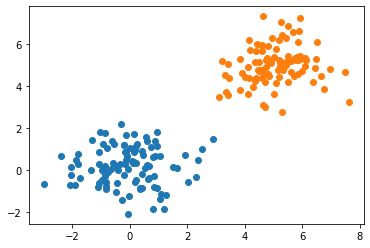

In [ ]:
X_1 = torch.normal(0,1, size=(100, 2))
Y_1 = torch.zeros((100, ))
X_2 = torch.normal(5,1, size=(100, 2))
Y_2 = torch.ones((100,))
plt.scatter(X_1[:,0], X_1[:, 1])
plt.scatter(X_2[:,0], X_2[:, 1])
plt.show()

In [ ]:
X_orig = torch.cat((X_1, X_2))
Y_orig = torch.cat((Y_1, Y_2))

indices = list(range(X.shape[0]))

import random
random.shuffle(indices)

X = X_orig[indices]
Y = Y_orig[indices]

In [ ]:
EPSILON = 1e-8
def cross_entropy_loss(Y, Y_hat):
    return - 1 / ( Y.shape[0]) * torch.sum(Y * torch.log(Y_hat + EPSILON) + (1 - Y) * torch.log(1 - Y_hat + EPSILON))

### Application of gradient descent

In [ ]:
# w is the parameter to optimize
w = torch.normal(mean=0, std=10, size=(X.shape[1],))

LEARNING_RATE = 1e-1

N_ITERATIONS = 10000

prev_loss = torch.FloatTensor([float('inf')])

for i in range(N_ITERATIONS):

    Y_hat = torch.sigmoid(X @ w)

    loss = cross_entropy_loss(Y, Y_hat)
    print(f"Step {i + 1} Loss: ", loss)
    if torch.isclose(prev_loss, loss, atol=1e-5):
        break
    
    w = w - LEARNING_RATE * ((Y_hat - Y) @ X) / Y.shape[0]
    prev_loss = loss

Step 1 Loss:  tensor(6.4149)
Step 2 Loss:  tensor(6.4064)
Step 3 Loss:  tensor(6.3952)
Step 4 Loss:  tensor(6.3866)
Step 5 Loss:  tensor(6.3739)
Step 6 Loss:  tensor(6.3655)
Step 7 Loss:  tensor(6.3547)
Step 8 Loss:  tensor(6.3209)
Step 9 Loss:  tensor(6.3122)
Step 10 Loss:  tensor(6.3036)
Step 11 Loss:  tensor(6.2933)
Step 12 Loss:  tensor(6.2820)
Step 13 Loss:  tensor(6.2733)
Step 14 Loss:  tensor(6.2633)
Step 15 Loss:  tensor(6.2547)
Step 16 Loss:  tensor(6.2462)
Step 17 Loss:  tensor(6.2211)
Step 18 Loss:  tensor(6.2126)
Step 19 Loss:  tensor(6.2030)
Step 20 Loss:  tensor(6.1944)
Step 21 Loss:  tensor(6.1574)
Step 22 Loss:  tensor(6.1489)
Step 23 Loss:  tensor(6.1395)
Step 24 Loss:  tensor(6.1285)
Step 25 Loss:  tensor(6.1201)
Step 26 Loss:  tensor(6.1069)
Step 27 Loss:  tensor(6.0923)
Step 28 Loss:  tensor(6.0838)
Step 29 Loss:  tensor(6.0479)
Step 30 Loss:  tensor(6.0066)
Step 31 Loss:  tensor(5.9976)
Step 32 Loss:  tensor(5.9846)
Step 33 Loss:  tensor(5.9729)
Step 34 Loss:  tens

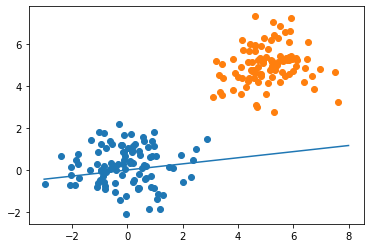

In [ ]:
x_1 = torch.linspace(-3, 8, 50)
x_2 = -w[0]/w[1] * x_1

plt.scatter(X_1[:, 0], X_1[:, 1])
plt.scatter(X_2[:, 0], X_2[:, 1])
plt.plot(x_1, x_2)

plt.show()

We see that our above classification line cuts through one of the classes. Can you explain what's happening?

This is something we can fix fix by adding a bias term.

In [ ]:
X_orig = torch.cat((X_1, X_2))

X_extra_dim = torch.cat((torch.ones((X_orig.shape[0],1)), X_orig), dim=1)
indices = list(range(X_extra_dim.shape[0]))

import random
random.shuffle(indices)

X = X_extra_dim[indices]
Y = Y_orig[indices]
print(X)
print(X.shape)

tensor([[ 1.0000e+00,  5.1917e+00,  6.2001e+00],
        [ 1.0000e+00, -1.0905e-01,  4.5680e-01],
        [ 1.0000e+00, -6.1245e-01,  1.3616e+00],
        [ 1.0000e+00,  4.3635e+00,  4.2201e+00],
        [ 1.0000e+00,  5.2688e-01,  7.6471e-02],
        [ 1.0000e+00,  3.1012e+00,  3.4726e+00],
        [ 1.0000e+00,  3.4479e+00,  4.3845e+00],
        [ 1.0000e+00,  1.5091e+00,  1.2509e-01],
        [ 1.0000e+00,  5.2372e+00,  4.9303e+00],
        [ 1.0000e+00,  4.7429e+00,  5.2426e+00],
        [ 1.0000e+00, -7.5121e-01, -8.4012e-02],
        [ 1.0000e+00,  9.6864e-01,  1.1601e+00],
        [ 1.0000e+00,  4.6026e+00,  5.9232e+00],
        [ 1.0000e+00, -8.0155e-01, -7.7829e-01],
        [ 1.0000e+00, -3.1384e-01,  3.0914e-01],
        [ 1.0000e+00,  7.3604e-01,  1.0907e+00],
        [ 1.0000e+00, -1.7648e-01,  1.1668e+00],
        [ 1.0000e+00,  4.6362e+00,  4.5970e+00],
        [ 1.0000e+00, -2.3739e+00,  6.4508e-01],
        [ 1.0000e+00,  3.2126e+00,  5.1997e+00],
        [ 1.0000e+00

In [ ]:
# w is the parameter to optimize
w = torch.normal(mean=0, std=5, size=(X.shape[1],))

LEARNING_RATE = 1e-1

N_ITERATIONS = 10000

prev_loss = torch.FloatTensor([float('inf')])

for i in range(N_ITERATIONS):

    Y_hat = torch.sigmoid(X @ w)

    loss = cross_entropy_loss(Y, Y_hat)
    print(f"Step {i + 1} Loss: ", loss)
    if torch.isclose(prev_loss, loss, atol=1e-6):
        break
    
    w = w - LEARNING_RATE * ((Y_hat - Y) @ X) / Y.shape[0]
    prev_loss = loss


Step 1 Loss:  tensor(2.7093)
Step 2 Loss:  tensor(2.6914)
Step 3 Loss:  tensor(2.6736)
Step 4 Loss:  tensor(2.6554)
Step 5 Loss:  tensor(2.6354)
Step 6 Loss:  tensor(2.6172)
Step 7 Loss:  tensor(2.6008)
Step 8 Loss:  tensor(2.5825)
Step 9 Loss:  tensor(2.5615)
Step 10 Loss:  tensor(2.5447)
Step 11 Loss:  tensor(2.5254)
Step 12 Loss:  tensor(2.5080)
Step 13 Loss:  tensor(2.4906)
Step 14 Loss:  tensor(2.4734)
Step 15 Loss:  tensor(2.4544)
Step 16 Loss:  tensor(2.4359)
Step 17 Loss:  tensor(2.4059)
Step 18 Loss:  tensor(2.3889)
Step 19 Loss:  tensor(2.3706)
Step 20 Loss:  tensor(2.3523)
Step 21 Loss:  tensor(2.3347)
Step 22 Loss:  tensor(2.3176)
Step 23 Loss:  tensor(2.2991)
Step 24 Loss:  tensor(2.2822)
Step 25 Loss:  tensor(2.2640)
Step 26 Loss:  tensor(2.2471)
Step 27 Loss:  tensor(2.2294)
Step 28 Loss:  tensor(2.2120)
Step 29 Loss:  tensor(2.1944)
Step 30 Loss:  tensor(2.1741)
Step 31 Loss:  tensor(2.1572)
Step 32 Loss:  tensor(2.1398)
Step 33 Loss:  tensor(2.1222)
Step 34 Loss:  tens

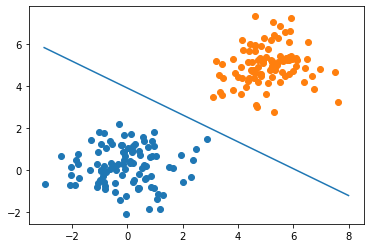

In [ ]:
x_1 = torch.linspace(-3, 8, 50)
x_2 =  -w[1]/w[2] * x_1 - w[0]/w[2]

plt.scatter(X_1[:, 0], X_1[:, 1])
plt.scatter(X_2[:, 0], X_2[:, 1])
plt.plot(x_1.detach().numpy(), x_2.detach().numpy())
plt.show()

### Using autograd

In [ ]:
# w is the parameter to optimize
w = torch.normal(mean=0, std=10, size=(X.shape[1],))
w.requires_grad = True

LEARNING_RATE = 0.1

N_ITERATIONS = 10000


prev_loss = torch.FloatTensor([float('inf')])

for i in range(N_ITERATIONS):

    Y_hat = torch.sigmoid(X @ w)

    loss = cross_entropy_loss(Y, Y_hat)
    print(f"Step {i + 1} Loss: ", loss)
    if torch.isclose(prev_loss, loss, atol=1e-5):
        break
    
    
    loss.backward()
    with torch.no_grad():
        w -= LEARNING_RATE * w.grad
        w.grad.zero_()
    prev_loss = loss

Step 1 Loss:  tensor(1.1025, grad_fn=<MulBackward0>)
Step 2 Loss:  tensor(1.0984, grad_fn=<MulBackward0>)
Step 3 Loss:  tensor(1.0935, grad_fn=<MulBackward0>)
Step 4 Loss:  tensor(1.0897, grad_fn=<MulBackward0>)
Step 5 Loss:  tensor(1.0855, grad_fn=<MulBackward0>)
Step 6 Loss:  tensor(1.0808, grad_fn=<MulBackward0>)
Step 7 Loss:  tensor(1.0770, grad_fn=<MulBackward0>)
Step 8 Loss:  tensor(1.0731, grad_fn=<MulBackward0>)
Step 9 Loss:  tensor(1.0685, grad_fn=<MulBackward0>)
Step 10 Loss:  tensor(1.0648, grad_fn=<MulBackward0>)
Step 11 Loss:  tensor(1.0609, grad_fn=<MulBackward0>)
Step 12 Loss:  tensor(1.0566, grad_fn=<MulBackward0>)
Step 13 Loss:  tensor(1.0527, grad_fn=<MulBackward0>)
Step 14 Loss:  tensor(1.0483, grad_fn=<MulBackward0>)
Step 15 Loss:  tensor(1.0444, grad_fn=<MulBackward0>)
Step 16 Loss:  tensor(1.0406, grad_fn=<MulBackward0>)
Step 17 Loss:  tensor(1.0365, grad_fn=<MulBackward0>)
Step 18 Loss:  tensor(1.0328, grad_fn=<MulBackward0>)
Step 19 Loss:  tensor(1.0286, grad_fn

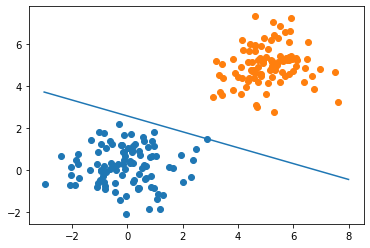

In [ ]:
x_1 = torch.linspace(-3, 8, 50)
x_2 =  - w[1]/w[2] * x_1 - w[0]/w[2]

plt.scatter(X_1[:, 0], X_1[:, 1])
plt.scatter(X_2[:, 0], X_2[:, 1])
plt.plot(x_1.detach().numpy(), x_2.detach().numpy())
plt.show()